In [ ]:
#Multiplayer Perceptron (MLP)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load and explore the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

In [3]:
# Convert dataset to a DataFrame for visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

In [4]:
# Display first few rows
print("Wine Dataset Sample:")
print(df.head())

Wine Dataset Sample:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

In [5]:
# Data Preprocessing (Normalization & Splitting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Build the MLP Model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5911 - loss: 0.9972 - val_accuracy: 0.6389 - val_loss: 0.8433
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6929 - loss: 0.8389 - val_accuracy: 0.6944 - val_loss: 0.7307
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7748 - loss: 0.7268 - val_accuracy: 0.7222 - val_loss: 0.6323
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8277 - loss: 0.6224 - val_accuracy: 0.8056 - val_loss: 0.5418
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9097 - loss: 0.5319 - val_accuracy: 0.8611 - val_loss: 0.4580
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9251 - loss: 0.4136 - val_accuracy: 0.8889 - val_loss: 0.3849
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9794 - loss: 0.3092 - val_accuracy: 0.8889 - val_loss: 0.3113
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9644 - loss: 0.2775 - val_accuracy: 0.9444 - val_loss

In [10]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0385

Test Accuracy: 100.00%


In [11]:
# Confusion Matrix and Classification Report
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [12]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



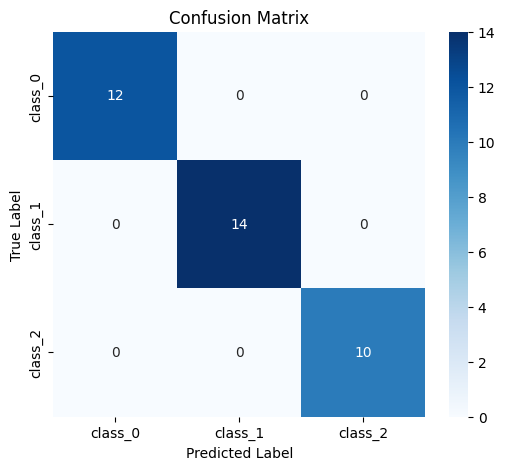

In [13]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Plot Training History (Accuracy & Loss)
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Training vs Validation Accuracy')

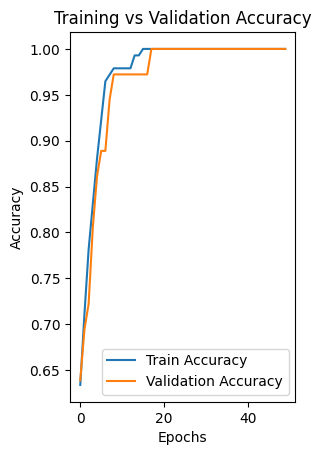

In [15]:
# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

Text(0.5, 1.0, 'Training vs Validation Loss')

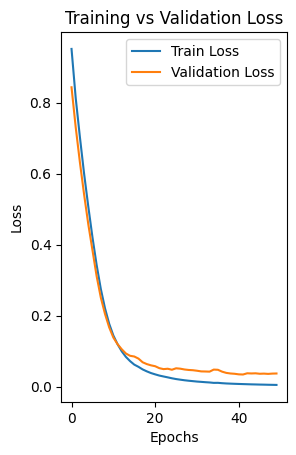

In [16]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

In [21]:
plt.show()

In [18]:
# Predict on New Sample Data
sample_index = 0  # Choose any test sample
sample_data = X_test[sample_index].reshape(1, -1)

In [19]:
# Predict class probabilities
prediction_prob = model.predict(sample_data)
predicted_class = np.argmax(prediction_prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [20]:
print(f"\nActual Class: {wine.target_names[y_test[sample_index]]}")
print(f"Predicted Class: {wine.target_names[predicted_class]}")


Actual Class: class_0
Predicted Class: class_0
